### Just Popping in - A Look at Access to Food and Convenience Items - Supermarkets and Convience Stores in Pittsburgh 

With access to a supermarket market or convenience store, those who park in our lot will be able to buy anything they need during a long car trip, use a restroom in case of an emergency, getting skittles to eat while kicking back with their friends out of the trunk of their car, or dining at a fine Italian restaurant. We aim to provide close drive or walk for our patrons so they find our lot convenient. 

As we look for convenience stores and supermarkets to satiate the needs of those parking in our lot, we delve into sorting the data in the table. The important data we need from the table includes the zipcode of the areas as well as the count of convenience stores or supermarkets they have. The list of zipcodes will help us identify what is the breadth of area we are looking at in order to find the most opportune place to pave our lot. 



In [14]:
import pandas as pd
import numpy as np
supAndCon = pd.read_csv("data-conveniencesupermarkets.csv", sep=",", dtype = str)
supAndCon.head(8)


,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202,40.495759,-80.066508,9,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143,40.545418,-80.194152,9,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202,40.510522,-80.094268,9,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205,41.203322,-77.194525,3,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143,40.553281,-80.109158,8,Convenience Store
5,201304220008,Radokovic Marathon,Radokovic Enterprises LlC,4/16/2013,1826,Lincoln Highway,PA,15137,40.367923,-79.780429,9,Convenience Store
6,200002290002,Sunoco #7544,Sunoco Inc R&M,2/2/2000,1201,Airport Blvdulevard,PA,15231,40.494177,-80.267208,9,Convenience Store
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207,40.370214,-79.913195,9,Convenience Store


### List of Zipcodes

In [15]:
print(supAndCon['Zip'].unique())
len(supAndCon['Zip'].unique())

['15202' '15143' '15205' '15137' '15231' '15207' '15101' '15112' '15229'
 '15222' '15210' '15104' '15146' '15132' '15219' '15024' '15208' '15237'
 '15239' '15025' '15120' '15217' '15129' '15014' '15037' '15218' '15214'
 '15236' '15227' '15232' '15108' '15145' '15235' '15035' '15144' '15034'
 '15026' '15131' '15106' '15221' '15241' '15228' '15206' '15065' '15204'
 '15088' '15147' '15223' '16046' '15234' '15090' '15045' '15133' '15212'
 '15084' '15226' '15110' '15116' '15136' '15071' '15044' '15213' '15201'
 '15225' '15220' '15017' '15233' '15086' '15135' '15203' '15224' '15209'
 '15238' '15216' '15215' '15102' '15211' '15122' '15140' '15046' '15139'
 '15142' '15282' '15030' '15057' '15018' '15056' '15127' '15275' '15076'
 nan]


91

There are 91 total zipcodes present in the supermarket and convenience store csv! 

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


### Creating the DataFrame

I narrowed the columns I am using down to the zipcodes and presence of supermarkets and convienence stores only. I counted how many convenience stores and supermarkets were in each zipcode, then made a total list of combining both convenience stores and zipcodes. 

In [17]:
df = pd.DataFrame(supAndCon.iloc[:, np.r_[7,11]])
df
query_mask_CS = supAndCon['Category'] == "Convenience Store"
query_mask_S = supAndCon['Category'] == "Supermarket"

print(query_mask_CS)

0       True
1       True
2       True
3       True
4       True
       ...  
667    False
668    False
669    False
670    False
671    False
Name: Category, Length: 672, dtype: bool


In [18]:
count = df.groupby(['Zip', 'Category']).size().to_frame().reset_index().rename(columns={0:"amount"})
count.sort_values("amount", axis = 0, ascending = False, inplace = True, na_position ='last')
print(count.head(8))
count_total = df.groupby(['Zip']).size().to_frame().reset_index().rename(columns={0:"amounts"})
count_total.sort_values("amounts", axis = 0, ascending = False, inplace = True, na_position ='last')
print(count_total.head(8))

print(count_total['amounts'].median())
print(count_total['amounts'].mean())

       Zip           Category  amount
135  15237  Convenience Store      18
111  15222  Convenience Store      17
38   15108  Convenience Store      16
57   15136  Convenience Store      16
105  15219  Convenience Store      16
89   15210  Convenience Store      14
69   15146  Convenience Store      14
93   15212  Convenience Store      14
      Zip  amounts
83  15237       28
46  15146       22
69  15222       21
35  15132       19
26  15108       19
57  15210       18
66  15219       17
60  15213       17
6.0
7.455555555555556


### Horizontal Bar Graph of Total Supermarkets and Convenience Stores per Zipcode

<Figure size 432x288 with 0 Axes>

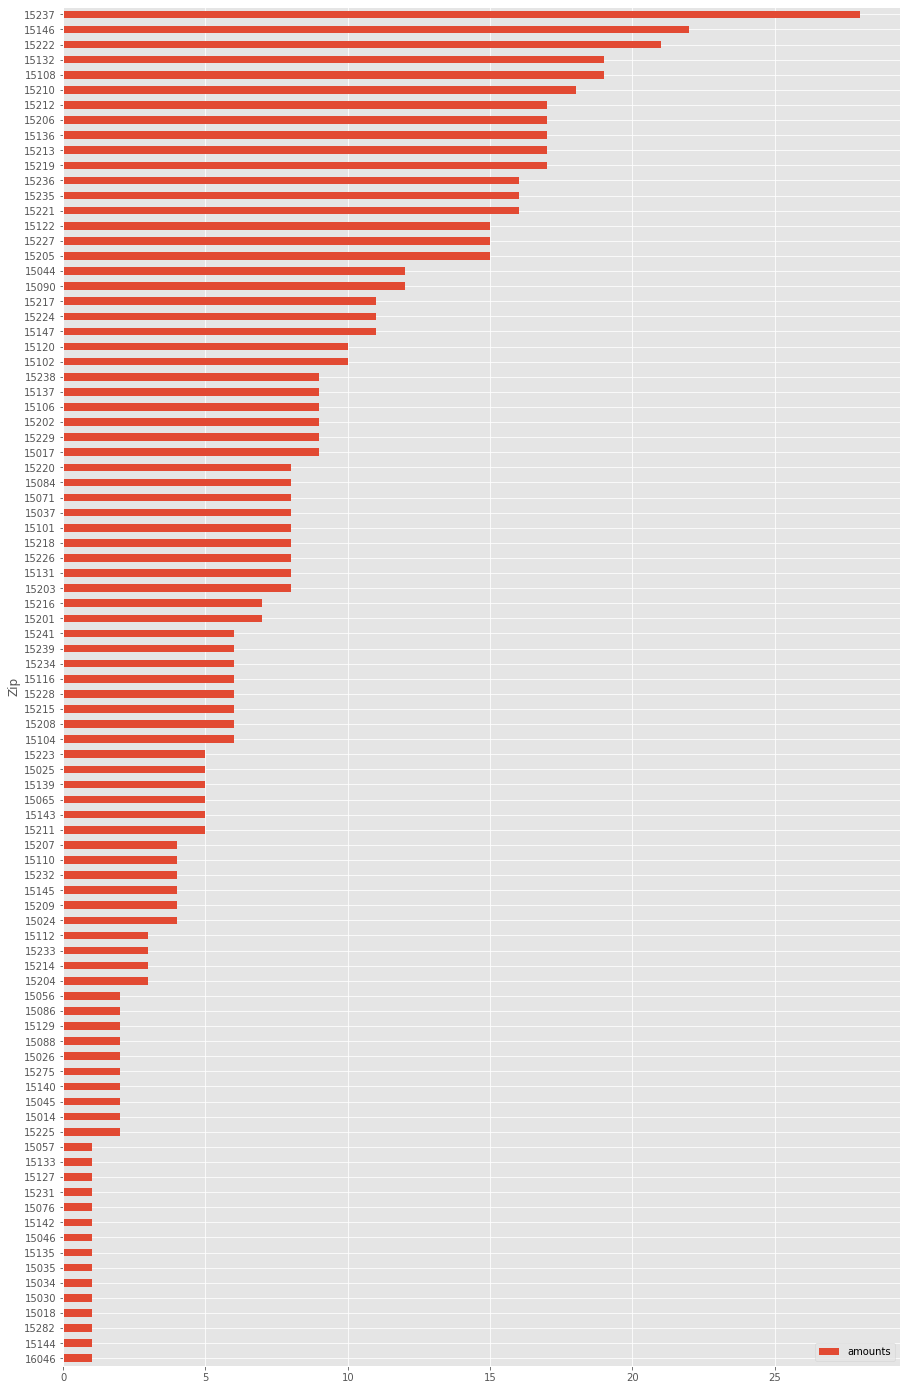

In [19]:
plt.tight_layout()
plt.style.use("ggplot")
chart_values = count_total[count_total["amounts"] > 0].sort_values('amounts')
chart_values.plot.barh(x="Zip",y="amounts",figsize=(15,25))
plt.savefig("zipVStores.png")

### Supermarkets vs Convenience Stores

What are the amount of supermarkets compared to convenience stores?

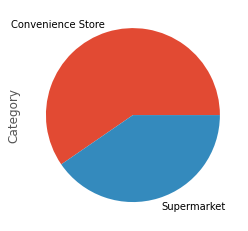

In [20]:
count["Category"].value_counts().sort_index().plot.pie(y='Category',  subplots=False,   figsize=(8, 4))

Convenience Stores are 76.9% of total shopping options while consist of Supermarkets = 23.1%. 


### Convenience Store and Supermarket Data Conclusion

In the Suburbs:
- 15237 --> Franklin Park, Townships of Ross & McCandless

Highest ranked in the City: 
- 15146 --> Monroeville
- 15222 --> Downtown
- 15132 --> McKeesport
- 15108 --> Coraopolis

The Overall Choice Between the Three Submetrics: 
- 15217 --> Squirrel Hill South

The median amount of convenience stores and supermarkets combined is 6, and the mean is 7.5. We are then able to conclude that neighborhoods with a higher amount than 7 has a higher than average amount of spots for folks to buy whatever they need, and return to our parking lot! 

The best neighborhoods for overall access to a store is Franklin Park and the Townships of Ross and McCandless. However, these are neighborhoods located outside of the Pittsburgh city area and are in the greater Pittsburgh area. Located in the suburbs of Pittsburgh, it's the clear winner. 

Next is Monroeville followed by downtown, McKeesport and Coraopolis. These neighborhoods have the highest convenience level to acquiring food, as I looked at total counts on accessibility.

For parking lot purposes, we take into account the amount of 311 calls, as well the amount of healthy trees in the area. These data point to Squirrel Hill South being the best area for our parking lot, and the Supermarket and Convenience Store data can support this by showing that the 15217 zipcode containing Squirrel Hill has 11 supermarkets and convenience stores. This is fifty percent higher than the average neighborhood! 